In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [21]:
df_marked = pd.read_excel('marked.xlsx')
df_raw = pd.read_excel('raw.xlsx')

In [22]:
print('df_marked.shape',df_marked.shape)
print('df_raw.shape',df_raw.shape)

df_marked.shape (36816, 45)
df_raw.shape (37339, 45)


## Функции

In [23]:
def get_marks(ser_raw, ser_marked):
    """Функция формирует разметку аномалий на основании очищенных
       и неочищенных данных.
    Аргументы:
    ser_raw - объект типа Series, сигнал датчика до удаления аномалий,
    ser_marked - объект типа Series, сигнал датчика после удаления аномалий.
    Возвращает:
    разметку аномалий по отсчетам датчиков в виде списка.
    """
    n_train = 0
    n_test_list = []
    r=len(n_test_list)
    for n_train in range(ser_marked.shape[0]):
        while ser_raw[r]!=ser_marked[n_train]:
            n_test_list.append(1)
            r=len(n_test_list)
        n_test_list.append(0)
        r=len(n_test_list)    
    return n_test_list  

Получаем разметку аномалий

In [24]:
y_raw = get_marks(df_raw.T.iloc[2], df_marked.T.iloc[2])
print(f'Хороших отсчетов в разметке {y_raw.count(0)}')
print(f'Плохих отсчетов в разметке {y_raw.count(1)}')
print(f'Всего отсчетов в разметке {len(y_raw)}')

Хороших отсчетов в разметке 36816
Плохих отсчетов в разметке 523
Всего отсчетов в разметке 37339


Визуализация одного датчика

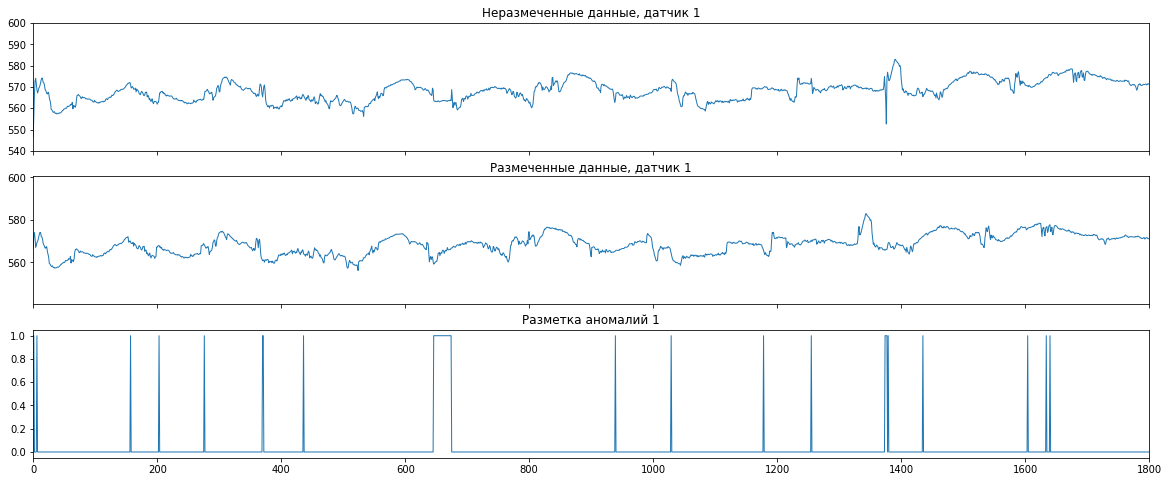

In [34]:
i_sensor = 1  # номер датчика

fig, axx = plt.subplots(3, 1, sharex=True, figsize=(20, 8))

plt.sca(axx[0])
plt.plot(df_raw.T.iloc[i_sensor+1], lw=1)
plt.title(f'Неочищенные данные, датчик {i_sensor}')
axx[0].set_ylim(540,600)
axx[0].set_xlim(0,1800)
plt.sca(axx[1])
plt.plot(df_marked.T.iloc[i_sensor+1], lw=1)
plt.title(f'Очищенные данные, датчик {i_sensor}')

plt.sca(axx[2])
plt.plot(np.arange(len(y_raw)), y_raw, lw=1)
plt.title(f'Разметка аномалий {i_sensor}');